In [1]:
# Fun some setup for the project
# Silence annoying pytorch deprecated warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from eval_nll import *
import numpy as np
%matplotlib inline

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Protein Dataset Notebook. Treat DD class 1 as the normal dataset and DD class 2 as the anomalous dataset 

In [2]:
nll_dir = 'nll/DD_1'

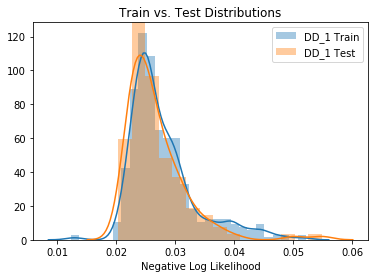

In [3]:
# Step 1
# Load the training and test nll predictions to test generalization
train_nlls = load_avg_nlls(nll_dir, 'train')
test_nlls = load_avg_nlls(nll_dir, 'test')

# Plot distribtutions
fig, ax_compare = compare_dist([train_nlls, test_nlls], ['DD_1 Train', 'DD_1 Test'], 'Train vs. Test Distributions')

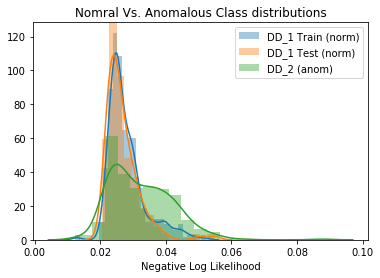

In [4]:
# Step 2 
# Compare the test graphs from the normal class nlls with the anomalous graph nlls
anom_nlls = load_avg_nlls(nll_dir, 'DD_2')

# Plot distribtutions
fig, ax_compare = compare_dist([train_nlls, test_nlls, anom_nlls], ['DD_1 Train (norm)', 'DD_1 Test (norm)', 'DD_2 (anom)'], 'Nomral Vs. Anomalous Class distributions')

# Let us try thresholding the nll of a graph to determine if it is normal or anomalous

In [47]:
threshold = 0.035
# Only include test_nlls.shape[0] examples
# from anom_nlls to balance dataset sizes
#anom_nlls_samples = np.random.choice(anom_nlls, test_nlls.shape[0])
anom_nlls_samples = anom_nlls
threshold_nlls = np.concatenate((test_nlls, anom_nlls_samples))
labels = np.zeros(threshold_nlls.shape[0])
labels[test_nlls.shape[0]:] = 1
anom_accuracy = anomally_detection_score(threshold_nlls, labels, threshold)
print ("Anomaly Detection Accuracy:", anom_accuracy)
all_0 = anomally_detection_score(np.zeros(threshold_nlls.shape), labels, threshold)
print ("All zeros accuracy:", all_0)

217.0
Anomaly Detection Accuracy: 0.520971302428
336.0
All zeros accuracy: 0.258278145695
